In [1]:
# Importing libraries and dataset

import pandas as pd
df = pd.read_csv('/Users/hamzaqadus/Desktop/911.csv')

In [2]:
# Testing dataset loaded properly and prints out first 5 rows
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
# Dataset description:
# The dataset contains 911 call data with the following columns:
# lat: Latitude of the call location
# lng: Longitude of the call location
# desc: Description of the call
# zip: Zip code of the call location
# title: Title of the call
# timeStamp: Timestamp of the call
# twp: Township of the call location
# addr: Address of the call location
# e: Emergency type of the call


In [4]:
# Preprocess the data
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['hour'] = pd.to_datetime(df['timeStamp']).dt.hour
df['day'] = pd.to_datetime(df['timeStamp']).dt.day
df['month'] = pd.to_datetime(df['timeStamp']).dt.month
df['weekday'] = df['timeStamp'].dt.day_name()
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,hour,day,month,weekday
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,17,10,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,10,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,14,10,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,16,10,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,16,10,12,Thursday


In [5]:
# Group by township based on the number of calls per hour
grouped = df.groupby(['twp', 'hour']).size().reset_index(name='call_count')
print(grouped.head())

        twp  hour  call_count
0  ABINGTON     0         703
1  ABINGTON     1         620
2  ABINGTON     2         573
3  ABINGTON     3         511
4  ABINGTON     4         495


In [6]:
mv = df.isnull().sum()
print(mv)

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
hour             0
day              0
month            0
weekday          0
dtype: int64


In [7]:
newdf = df.dropna()
newdf.isnull().sum()

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
hour         0
day          0
month        0
weekday      0
dtype: int64

In [8]:
newdf.dtypes

lat                 float64
lng                 float64
desc                 object
zip                 float64
title                object
timeStamp    datetime64[ns]
twp                  object
addr                 object
e                     int64
hour                  int32
day                   int32
month                 int32
weekday              object
dtype: object

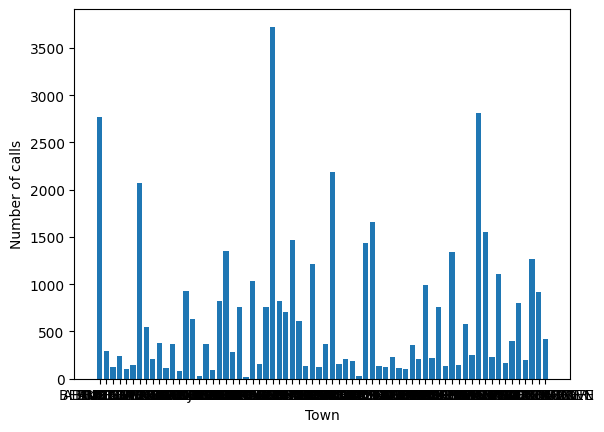

In [9]:
# Plot by total number of calls per town 

# this code is from above and just to help me
# grouped = df.groupby(['twp', 'hour']).size().reset_index(name='call_count')

import matplotlib.pyplot as plt
x = grouped['twp']
y = grouped['call_count']
plt.xlabel('Town')
plt.ylabel('Number of calls')
plt.bar(x,y)
plt.show()

In [10]:
newdf['weekday'].value_counts()

weekday
Friday       90328
Wednesday    87563
Thursday     86780
Tuesday      85890
Monday       85260
Saturday     78144
Sunday       69234
Name: count, dtype: int64

In [11]:
newdf['hour'].value_counts()

hour
17    38301
16    37164
15    36850
12    35576
14    35331
13    35078
11    33818
18    32606
10    32528
9     31473
8     29004
19    28768
20    24996
7     23215
21    21882
22    18030
23    14792
6     14569
0     12264
1     10498
5     10221
2      9506
3      8443
4      8286
Name: count, dtype: int64

In [12]:
newdf['month'].value_counts()

month
1     55282
3     53240
6     52577
7     52491
12    50772
5     50342
2     48916
4     47344
10    44576
11    44080
8     42299
9     41280
Name: count, dtype: int64

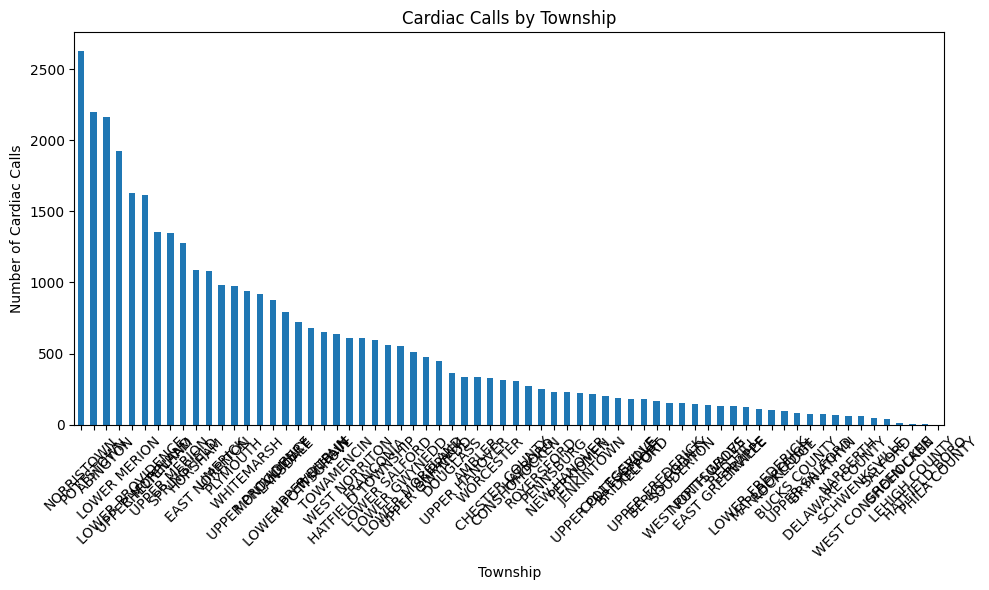

In [13]:
# Group and count first
grouped_2 = newdf.groupby(['twp','title', 'hour']).size().reset_index(name='call_count')

# Filter for cardiac-related calls
cardiac_calls = grouped_2[grouped_2['title'].str.contains('CARDIAC', case=False, na=False)]

# Sum cardiac calls by township
cardiac_by_twp = cardiac_calls.groupby('twp')['call_count'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
cardiac_by_twp.plot(kind='bar')
plt.title('Cardiac Calls by Township')
plt.xlabel('Township')
plt.ylabel('Number of Cardiac Calls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Predict the number of calls per hour in each time using linear regression 

from sklearn import linear_model
regr = linear_model.LinearRegression()
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

df2 = newdf.groupby(['twp', 'hour', 'day', 'month']).size().reset_index(name='call_count') #Datapoints we are focusing on
X = df2[['twp', 'hour', 'day', 'month']] # X variables, our independent variables which is used as the basis for predicting calls count
y = df2['call_count'] # establish our dependent variable call count
X_encoded = pd.get_dummies(X, columns=['twp'], drop_first=True) # one hot encoding
#trainining and running our linear regression model below
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
model = linear_model.LinearRegression() #trainining 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [21]:

model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# The model achieved an RMSE of 1.64, meaning that on average, its predictions
# for 911 call volume per township-hour combination are off by about 1.6 calls.
# Given that most hourly call counts are in the low single digits, this is a 
# reasonably good performance for a baseline linear regression model.
# However, the RMSE being higher than the MAE (1.11) suggests the model occasionally
# makes larger errors, which could be addressed by using more flexible models like
# Random Forest or XGBoost that can better capture non-linear patterns in the data.

MAE: 1.11
RMSE: 1.64


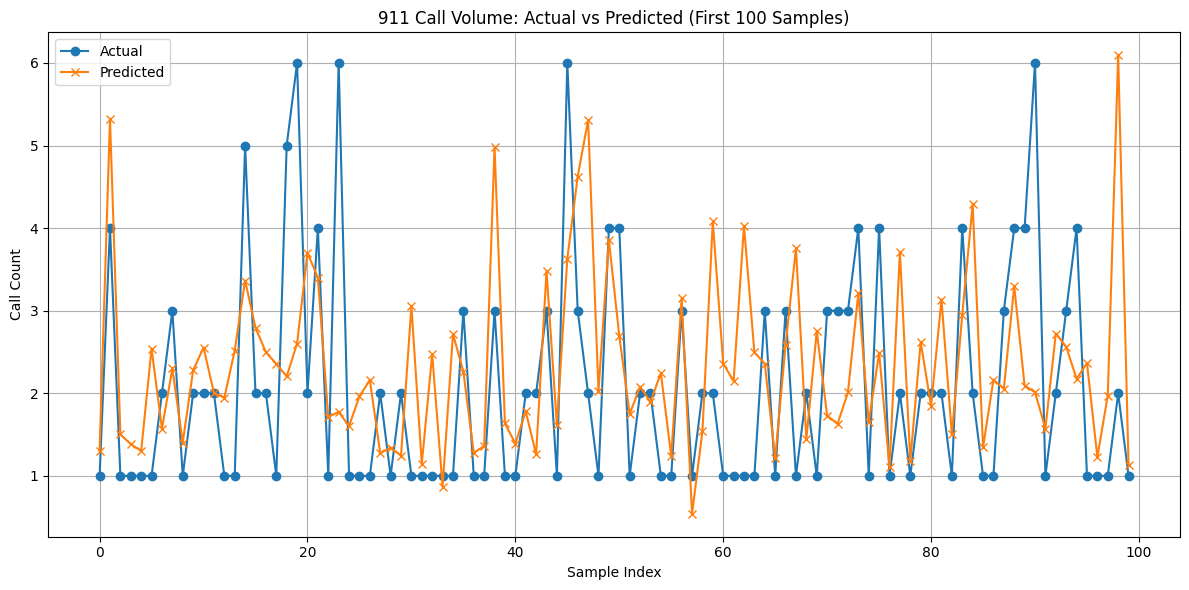

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title('911 Call Volume: Actual vs Predicted (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Call Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Graph below which shows the actual 911 calls vs the predicted, call count is not as accurate initially up to around sample index 20,
# however it then improves which is down to the model learning

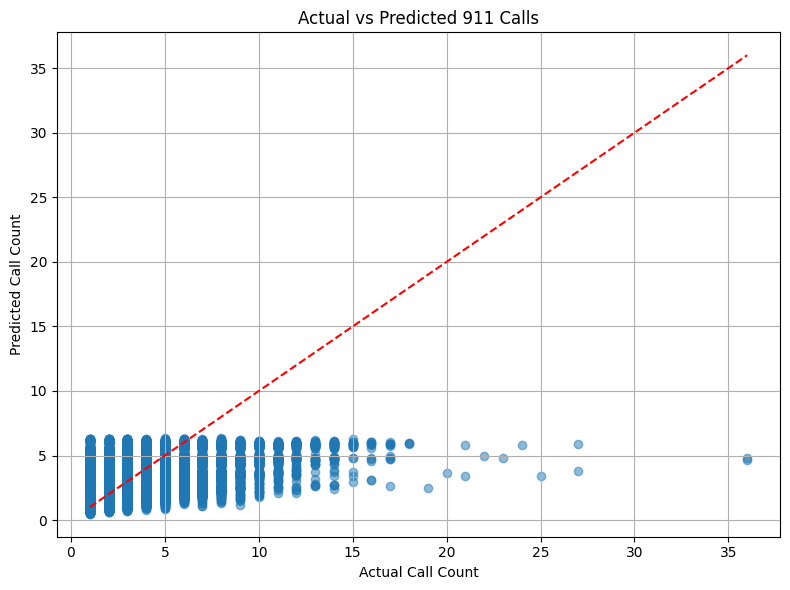

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel('Actual Call Count')
plt.ylabel('Predicted Call Count')
plt.title('Actual vs Predicted 911 Calls')
plt.grid(True)
plt.tight_layout()
plt.show()

# This scatter plot compares the actual 911 call counts (x-axis) to the predicted call counts (y-axis)
# for each sample in the test set.

# Each blue dot represents one prediction: 
# - If the dot is close to the red dashed line, the prediction is accurate.
# - If the dot is far from the line, the model either under- or over-predicted.

# The red dashed line represents the ideal case where predicted = actual (a perfect model).
# Dots above the line are over-predictions; dots below the line are under-predictions.

# From this plot, we can visually assess how well the model performed:
# - The model does well when actual call counts are low (0–10), but tends to under-predict when 
#   the actual number of calls is higher (e.g., 15+).
# - This reflects the limitations of the linear regression model and suggests potential
#   improvements using more flexible models like Random Forest or XGBoost.


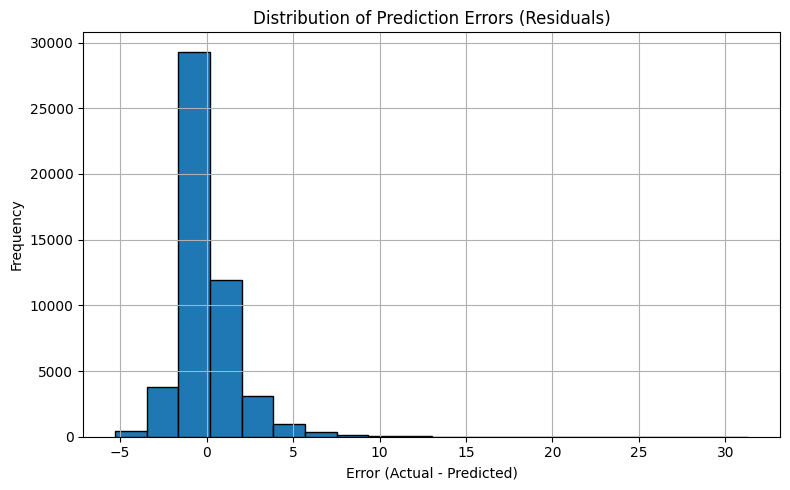

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=20, edgecolor='k')
plt.title('Distribution of Prediction Errors (Residuals)')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# This histogram visualises the distribution of residuals (prediction errors),
# calculated as: Actual - Predicted.

# A residual close to 0 means the model made a very accurate prediction.
# Negative values mean the model overestimated the call volume.
# Positive values mean the model underestimated the call volume.

# In this plot:
# - Most of the errors are tightly clustered around 0, which is a good sign.
# - The distribution is slightly right-skewed, meaning the model tends to underpredict
#   high call volumes more often than it overpredicts them.
# - A few outliers exist (larger errors beyond ±10), which could correspond to 
#   unexpected spikes in real emergency calls that the model couldn’t anticipate.

# This kind of visual is useful to understand whether the model has bias in one direction
# (e.g., consistently underpredicting), and whether it handles extreme values well.
